In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

## Section 1: English Characters

#### 1.1 Reorder correlation matrix

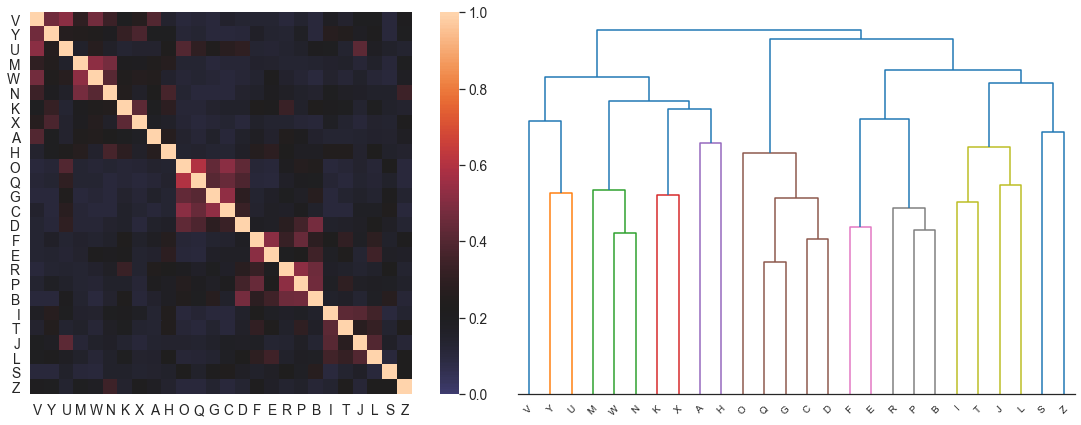

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reorder Similarity Matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load similarity matrix.
f = os.path.join('similarity', 'simMatrix_English_upper.csv')
similarity = read_csv(f, sep=',', index_col=0).fillna(10) / 10

## Compute pairwise Euclidean distances.
pairwise_distances = sch.distance.pdist(similarity)

## Compute linkages (method='complete').
linkage = sch.linkage(pairwise_distances, method='complete')

## Define new orderings.
cluster_distance_threshold = pairwise_distances.max() / 2
idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, criterion='distance')
idx = np.argsort(idx_to_cluster_array)

## Re-order similarity matrix.
reordered = similarity.iloc[idx, :].T.iloc[idx, :]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(16,6))

## Plot reordered similarity matrix.
sns.heatmap(reordered, vmin=0, vmax=1, center=0.225, square=True, ax=axes[0],
            xticklabels=reordered.columns, yticklabels=reordered.columns)

## Plot dendogram.
sch.dendrogram(linkage);
axes[1].set(xticklabels=reordered.columns, yticks=[])
sns.despine(ax=axes[1], left=True)

plt.tight_layout()

#### 1.2 Manual ordering

Semi-supervised clustering steps:
1. Starting with ordering above, split into two lists by taking odd- and even-positioned characters.
2. Within each list, take every fourth character and split into four lists. Recombine.
3. Manually tweak. 

Note: To pair down to 24 characters, we remove "I" and "O".

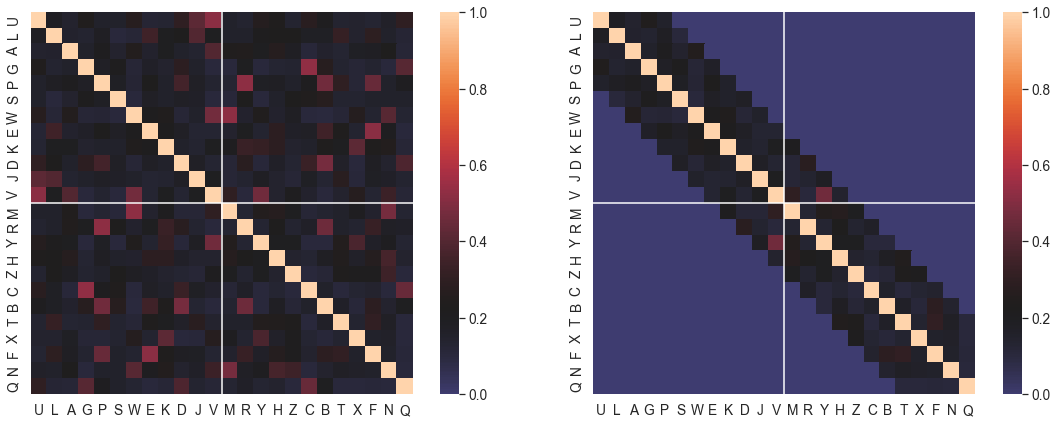

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reorder Similarity Matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define block 1 membership.
block_1 = ['U', 'L', 'A', 'G', 'P', 'S', 'W', 'E', 'K', 'D', 'J', 'V']

## Define block 2 membership.
block_2 = ['M', 'R', 'Y', 'H', 'Z', 'C', 'B', 'T', 'X', 'F', 'N', 'Q']

## Recombine lists and re-order.
idx = block_1 + block_2
manual = similarity.loc[idx, :].T.loc[idx, :]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(16,6))

## Define masked similarity matrix.
masked = manual.values.copy()
masked[np.triu_indices_from(masked, k=5)]  = 0
masked[np.tril_indices_from(masked, k=-5)] = 0

## Plot reordered similarity matrix.
sns.heatmap(manual, vmin=0, vmax=1, center=0.225, square=True, ax=axes[0],
            xticklabels=manual.columns, yticklabels=manual.columns)
axes[0].axhline(12, 0, 24, color='w'); axes[0].axvline(12, 0, 24, color='w')

## Plot masked similarity matrix.
sns.heatmap(masked, vmin=0, vmax=1, center=0.225, square=True, ax=axes[1],
            xticklabels=manual.columns, yticklabels=manual.columns)
axes[1].axhline(12, 0, 24, color='w'); axes[1].axvline(12, 0, 24, color='w')

plt.tight_layout()

The manual ordering produdure above produces the following stimulus sequence:

<img src="similarity/Elianto.png" width="480"/>

## Section 2: BACS 1

#### 2.1 Reorder correlation matrix

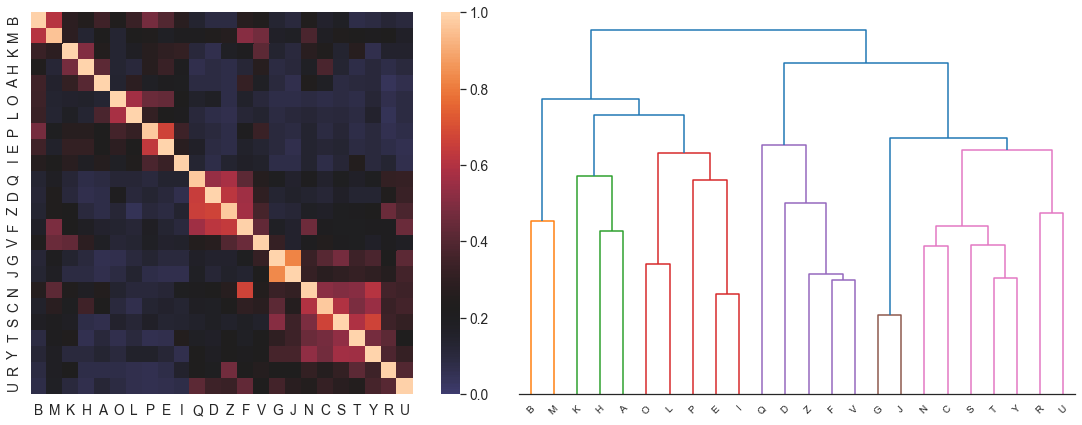

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reorder Similarity Matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load similarity matrix.
f = os.path.join('similarity', 'simMatrix_BACS_1_upper.tsv')
similarity = read_csv(f, sep='\t', index_col=0)

## Compute pairwise Euclidean distances.
pairwise_distances = sch.distance.pdist(similarity)

## Compute linkages (method='complete').
linkage = sch.linkage(pairwise_distances, method='complete')

## Define new orderings.
cluster_distance_threshold = pairwise_distances.max() / 2
idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, criterion='distance')
idx = np.argsort(idx_to_cluster_array)

## Re-order similarity matrix.
reordered = similarity.iloc[idx, :].T.iloc[idx, :]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(16,6))

## Plot reordered similarity matrix.
sns.heatmap(reordered, vmin=0, vmax=1, center=0.225, square=True, ax=axes[0],
            xticklabels=reordered.columns, yticklabels=reordered.columns)

## Plot dendogram.
sch.dendrogram(linkage);
axes[1].set(xticklabels=reordered.columns, yticks=[])
sns.despine(ax=axes[1], left=True)

plt.tight_layout()

#### 2.2 Manual ordering

Semi-supervised clustering steps:
1. Starting with ordering above, split into two lists by taking odd- and even-positioned characters.
2. Within each list, take every third character and split into three lists. Recombine.
3. Manually tweak. 

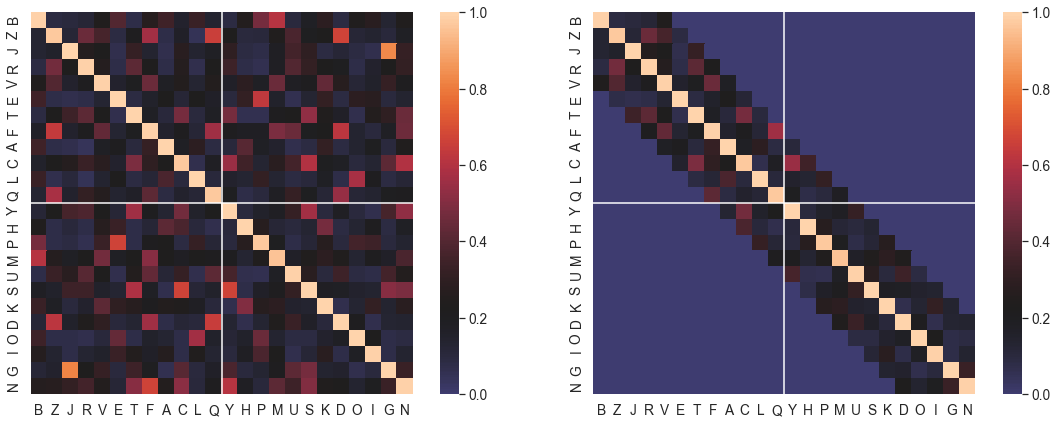

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reorder Similarity Matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define block 1 membership.
block_1 = ['B', 'Z', 'J', 'R', 'V', 'E', 'T', 'F', 'A', 'C', 'L', 'Q']

## Define block 2 membership.
block_2 = ['Y', 'H', 'P', 'M', 'U', 'S', 'K', 'D', 'O', 'I', 'G', 'N']

## Recombine lists and re-order.
idx = block_1 + block_2
manual = similarity.loc[idx, :].T.loc[idx, :]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(16,6))

## Define masked similarity matrix.
masked = manual.values.copy()
masked[np.triu_indices_from(masked, k=5)]  = 0
masked[np.tril_indices_from(masked, k=-5)] = 0

## Plot reordered similarity matrix.
sns.heatmap(manual, vmin=0, vmax=1, center=0.225, square=True, ax=axes[0],
            xticklabels=manual.columns, yticklabels=manual.columns)
axes[0].axhline(12, 0, 24, color='w'); axes[0].axvline(12, 0, 24, color='w')

## Plot masked similarity matrix.
sns.heatmap(masked, vmin=0, vmax=1, center=0.225, square=True, ax=axes[1],
            xticklabels=manual.columns, yticklabels=manual.columns)
axes[1].axhline(12, 0, 24, color='w'); axes[1].axvline(12, 0, 24, color='w')

plt.tight_layout()

The manual ordering produdure above produces the following stimulus sequence:

<img src="similarity/BACS1.png" width="480"/>

## Section 3: BACS 2

#### 3.1 Reorder correlation matrix

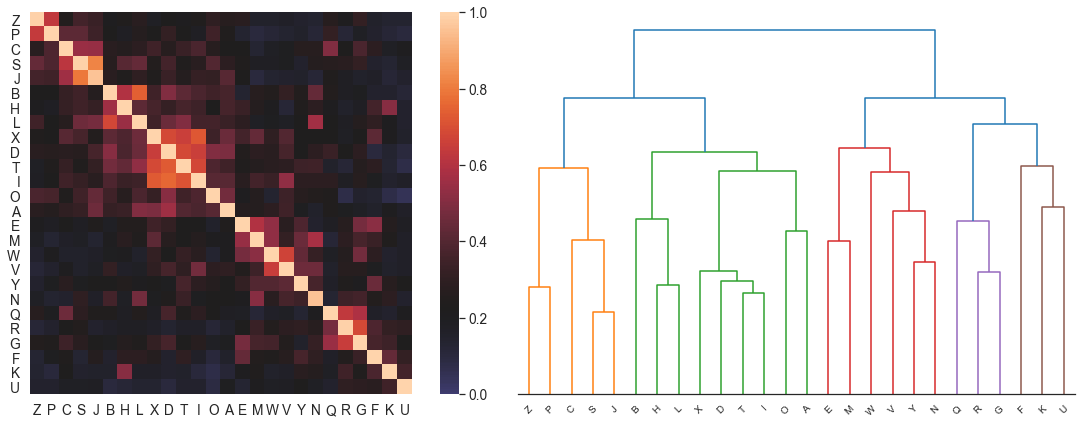

In [6]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reorder Similarity Matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Load similarity matrix.
f = os.path.join('similarity', 'simMatrix_BACS_2_upperSerif.tsv')
similarity = read_csv(f, sep='\t', index_col=0)

## Compute pairwise Euclidean distances.
pairwise_distances = sch.distance.pdist(similarity)

## Compute linkages (method='complete').
linkage = sch.linkage(pairwise_distances, method='complete')

## Define new orderings.
cluster_distance_threshold = pairwise_distances.max() / 2
idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, criterion='distance')
idx = np.argsort(idx_to_cluster_array)

## Re-order similarity matrix.
reordered = similarity.iloc[idx, :].T.iloc[idx, :]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(16,6))

## Plot reordered similarity matrix.
sns.heatmap(reordered, vmin=0, vmax=1, center=0.225, square=True, ax=axes[0],
            xticklabels=reordered.columns, yticklabels=reordered.columns)

## Plot dendogram.
sch.dendrogram(linkage);
axes[1].set(xticklabels=reordered.columns, yticks=[])
sns.despine(ax=axes[1], left=True)

plt.tight_layout()

#### 2.2 Manual ordering

Semi-supervised clustering steps:
1. Starting with ordering above, split into two lists by taking odd- and even-positioned characters.
2. Within each list, take every second character and split into two lists. Recombine.
3. Manually tweak. 

Note: To pair down to 24 characters, we remove "I" and "D".

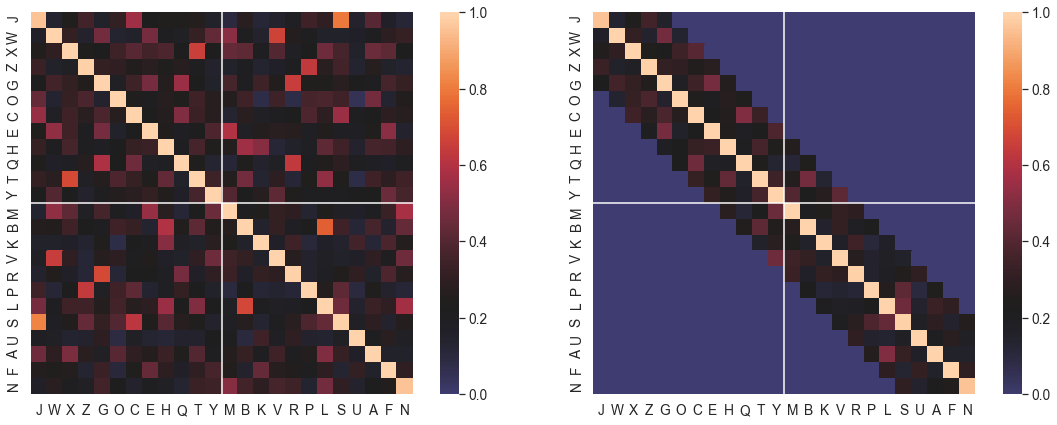

In [7]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Reorder Similarity Matrix.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define block 1 membership.
block_1 = ['J', 'W', 'X', 'Z', 'G', 'O', 'C', 'E', 'H', 'Q', 'T', 'Y']

## Define block 2 membership.
block_2 = ['M', 'B', 'K', 'V', 'R', 'P', 'L', 'S', 'U', 'A', 'F', 'N']

## Recombine lists and re-order.
idx = block_1 + block_2
manual = similarity.loc[idx, :].T.loc[idx, :]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(16,6))

## Define masked similarity matrix.
masked = manual.values.copy()
masked[np.triu_indices_from(masked, k=5)]  = 0
masked[np.tril_indices_from(masked, k=-5)] = 0

## Plot reordered similarity matrix.
sns.heatmap(manual, vmin=0, vmax=1, center=0.225, square=True, ax=axes[0],
            xticklabels=manual.columns, yticklabels=manual.columns)
axes[0].axhline(12, 0, 24, color='w'); axes[0].axvline(12, 0, 24, color='w')

## Plot masked similarity matrix.
sns.heatmap(masked, vmin=0, vmax=1, center=0.225, square=True, ax=axes[1],
            xticklabels=manual.columns, yticklabels=manual.columns)
axes[1].axhline(12, 0, 24, color='w'); axes[1].axvline(12, 0, 24, color='w')

plt.tight_layout()

The manual ordering produdure above produces the following stimulus sequence:

<img src="similarity/BACS2.png" width="480"/>